In [3]:
import pandas as pd
import os

bandit_file="/Users/ruthjohnson/Desktop/CS230/bandit parser/test_bandit.txt"
benchmark_name=os.path.basename(bandit_file).split('_bandit.txt')[0]
benchmark_name

'test'

In [5]:
df = pd.read_csv(bandit_file, sep=',')

total_security_issues = len(df.index)

total_security_issues

4

In [11]:
dataframe_file="/Users/ruthjohnson/Desktop/CS230/stat_analysis/test_dataframe.txt"

df = pd.read_csv(dataframe_file)

df

,B101,B102,HIGH_SEVERITY,MED_SEVERITY,LOW_SEVERITY,TOTAL_BANDIT,I,R,C,W,E,F,TOTAL_PYLINT
0,1,4,2,2,1,5,2,2,2,2,2,2,12
1,1,4,2,2,1,5,2,2,2,1,2,2,12
2,1,5,2,2,1,5,2,2,2,2,2,3,12
3,1,4,2,2,5,5,2,6,2,2,2,2,20


# Overall correlation between security and errors

In [12]:
import scipy.stats as st
import statsmodels.formula.api as smf

print(df.columns)
model = smf.ols('TOTAL_BANDIT ~ TOTAL_PYLINT', data=df).fit()
summary = model.summary()
print(summary)


Index(['B101', 'B102', 'HIGH_SEVERITY', 'MED_SEVERITY', 'LOW_SEVERITY',
       'TOTAL_BANDIT', 'I', 'R', 'C', 'W', 'E', 'F', 'TOTAL_PYLINT'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:           TOTAL_BANDIT   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -2.000
Date:                Fri, 31 May 2019   Prob (F-statistic):               1.00
Time:                        14:11:06   Log-Likelihood:                 130.18
No. Observations:                   4   AIC:                            -256.4
Df Residuals:                       2   BIC:                            -257.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t 

/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


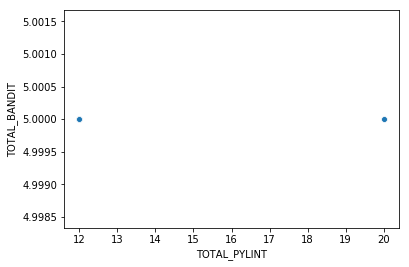

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.scatterplot(x='TOTAL_PYLINT', y='TOTAL_BANDIT', data=df)

# plot slope too 

plt.show()

In [16]:
model = smf.ols('HIGH_SEVERITY ~ I + R + C + W + E + F', data=df).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          HIGH_SEVERITY   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -0.000
Date:                Fri, 31 May 2019   Prob (F-statistic):                nan
Time:                        14:14:05   Log-Likelihood:                 132.72
No. Observations:                   4   AIC:                            -257.4
Df Residuals:                       0   BIC:                            -259.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1538        inf          0        n

/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/ruthjohnson/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encount